## Pandas Series

https://pandas.pydata.org/docs/

- pandas의 Series는 1차원 데이터를 다루는 데 효과적인 자료구조이며ㅡ DataFrame은 행과 열로 구성된 2차원 데이터를 다루는 데 효과적인 자료구조이다
- pandas의 Series는 어떤 면에서는 python의 list와 비슷하고 어떤 면에서는 python의 dictionary와 닮은 자료구조이다
    - 정수를 사용해서 데이터를 선택하는 리스트 기능
    - Label을 사용해서 데이터를 선택하는 사전 기능

### 데이터를 Series로 저장해보기
- Series 객체를 생성할 때 따로 인덱스를 지정하지 않으면 0부터 시작하는 정숫값으로 인덱싱된다

In [1]:
import pandas as pd

kakao = pd.Series([92600, 92400, 92100, 94300, 92300])
print(kakao)

0    92600
1    92400
2    92100
3    94300
4    92300
dtype: int64


인덱스를 지정하지 않는 경우, 자동으로 정숫값 indexing된다

In [2]:
kakao2 = pd.Series([92600, 92400, 92100, 94300, 92300], 
                   index = ['2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09'])
print(kakao2)

2017-03-03    92600
2017-03-06    92400
2017-03-07    92100
2017-03-08    94300
2017-03-09    92300
dtype: int64


In [3]:
print(kakao2['2017-03-09'])

92300


In [158]:
kakao2.iloc[2]

92100

In [5]:
pd.date_range('2024-01-01', '2024-02-01', freq = 'B')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01'],
              dtype='datetime64[ns]', freq='B')

In [7]:
my_ind = pd.date_range('2023-01-02', periods = 6) # date_range method통해 datetime index 객체 생성가능
my_ind

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq='D')

In [9]:
kakao2 = pd.Series(
    [92600, 93400, 94500, 93800, 94000, 93500], 
    index = my_ind,
    name = 'kakao'
) # index 변경 가능
kakao2

2023-01-02    92600
2023-01-03    93400
2023-01-04    94500
2023-01-05    93800
2023-01-06    94000
2023-01-07    93500
Freq: D, Name: kakao, dtype: int64

freq의 parameter로 'B' (Buisness day)를 넣으면, 공휴일은 자동으로 건너 뛴다

In [10]:
kakao2 = pd.Series([92600, 92400, 92100, 94300, 92300], 
                   index = pd.date_range('20230105', freq = 'B', periods = 5))
print(kakao2)

2023-01-05    92600
2023-01-06    92400
2023-01-09    92100
2023-01-10    94300
2023-01-11    92300
Freq: B, dtype: int64


In [11]:
kakao2.index

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11'],
              dtype='datetime64[ns]', freq='B')

In [12]:
kakao2.values

array([92600, 92400, 92100, 94300, 92300])

- Pandas의 Series 객체에는 **index**와 **값**이 저장되어 있는데 Series 객체의 **index**와 **values**라는 이름의 속성을 통해 접근할 수 있다
- 예를 들어, kakao2 객체의 index값과 저장된 종가를 각각 출력하는 코드는 다음과 같이 구현할 수 있다

In [62]:
for date in kakao2.index : print(date)
for ending_price in kakao2.values : print(ending_price)

2023-01-05 00:00:00
2023-01-06 00:00:00
2023-01-09 00:00:00
2023-01-10 00:00:00
2023-01-11 00:00:00
92600
92400
92100
94300
92300


### Series 객체의 덧셈 연산
- indexing이 서로 다른 경우에도 알아서 indexing이 같은 값들끼리 덧셈 연산을 수행한다

In [13]:
pd.Series([10, 20, 30], index = ['naver', 'sk', 'kt'])

naver    10
sk       20
kt       30
dtype: int64

In [14]:
pd.Series([10, 30, 20], index = ['kt', 'naver', 'sk'])

kt       10
naver    30
sk       20
dtype: int64

In [15]:
mine = pd.Series([10, 20, 30], index = ['naver', 'sk', 'kt'])
friend = pd.Series([10, 30, 20], index = ['kt', 'naver', 'sk'])
merge = mine + friend
print(merge)

kt       40
naver    40
sk       40
dtype: int64


### Example 2.
- pandas와 numpy의 관계를 확인해 보자

In [16]:
obj = pd.Series([3,6,9,12])
print(obj)
print(type(obj)) # Series
print(len(obj)) # data의 길이

0     3
1     6
2     9
3    12
dtype: int64
<class 'pandas.core.series.Series'>
4


In [17]:
obj = pd.Series([3,6,9,12], index = ['a','b','c','d']) # string 인덱스 가능
obj

a     3
b     6
c     9
d    12
dtype: int64

In [18]:
emp = {'김철수' : 5000, '김철호' : 7000, '한상민' : 4000, '문대용' : 4500} # dictionary 이용
obj = pd.Series(emp)
obj

김철수    5000
김철호    7000
한상민    4000
문대용    4500
dtype: int64

### Series Method

In [19]:
my_se = pd.Series([10,20,30])
my_se[2] # indexing

30

In [20]:
my_se1 = pd.Series([10,20,30], index = ['Samsung','Naver','LG'])
my_se1

Samsung    10
Naver      20
LG         30
dtype: int64

In [21]:
my_se1['LG'] # 문자열 인덱스는 문자열로 indexing을 해야 한다

30

In [22]:
my_se1.iloc[2] # 정수로 인덱싱을 원하면 iloc method를 사용해야 한다

30

In [23]:
my_se1.sort_values() # value값 기준으로 정렬, default는 오름차순

Samsung    10
Naver      20
LG         30
dtype: int64

In [26]:
my_se1.sort_index(ascending = False) # index값 기준으로 정렬, default는 사전순

Samsung    10
Naver      20
LG         30
dtype: int64

In [27]:
my_se.sort_values(ascending = False) # ascending argument를 통해 정렬 기준을 반대로 할 수 있다

2    30
1    20
0    10
dtype: int64

In [30]:
my_se1.where(my_se1 > 15)

Samsung     NaN
Naver      20.0
LG         30.0
dtype: float64

NaN은 **Not a Number**이라는 뜻으로, float형 데이터지만 아무런 숫자 정보가 없는 데이터이다
- dropna(   ) method를 통해 제거가 가능하다

In [75]:
my_se1.where(my_se1 > 15).dropna() # NaN 제거 가능

Naver    20.0
LG       30.0
dtype: float64

In [31]:
buy_stock = pd.Series([20,20,30], index = ['Samsung','Naver','Kakao'])
buy_stock

Samsung    20
Naver      20
Kakao      30
dtype: int64

In [32]:
my_se1 + buy_stock # 단순히 합치면 인덱스가 겹치지 않는 부분은 NaN값으로 채워진다

Kakao       NaN
LG          NaN
Naver      40.0
Samsung    30.0
dtype: float64

In [33]:
new_my_se1 = my_se1.add(buy_stock, fill_value = 0) 
# add method에서 fill_value를 0으로 지정하면 NaN값으로 바뀌지 않는다
new_my_se1

Kakao      30.0
LG         30.0
Naver      40.0
Samsung    30.0
dtype: float64

- add는 이항연산이므로, operand가 NaN일 경우 대체될 value를 fill_value로 지정하면 NaN값이 되지 않는다
- 연산에 NaN이 포함되면, float64로 바뀐다

In [34]:
new_my_se2 = new_my_se1.astype('int64')
new_my_se2 # astype method를 통해 data type을 바꿀 수 있다

Kakao      30
LG         30
Naver      40
Samsung    30
dtype: int64

In [35]:
new_my_se2.diff() # diff method를 사용하면 앞, 뒤 value의 차이를 계산해 준다

Kakao       NaN
LG          0.0
Naver      10.0
Samsung   -10.0
dtype: float64

In [36]:
new_my_se2.shift(1) # shift method는 인수로 입력된 수만큼 value를 뒤로 밀어준다

Kakao       NaN
LG         30.0
Naver      30.0
Samsung    40.0
dtype: float64

### Statistical Method
- Numpy와 Pandas에서는 기본적인 통계 method를 제공한다

In [37]:
new_my_se2

Kakao      30
LG         30
Naver      40
Samsung    30
dtype: int64

In [38]:
new_my_se2.mean()

32.5

In [39]:
new_my_se2.var()

25.0

In [40]:
new_my_se2.std()

5.0

In [41]:
new_my_se2.skew()

1.9999999999999998

In [42]:
new_my_se2.kurt()

4.0

### Example 3.
- pandas datareader를 이용해 통계 관련 method를 직접 사용해 보자

In [46]:
#pip install pandas_datareader
import datetime
import pandas_datareader as wb

start = datetime.datetime(2022, 2, 1)
end = datetime.datetime(2024, 2, 21)
df_null = wb.DataReader("KOSPI", "naver", start, end)
series = df_null['Close'].dropna().astype('float')

<Axes: xlabel='Date'>

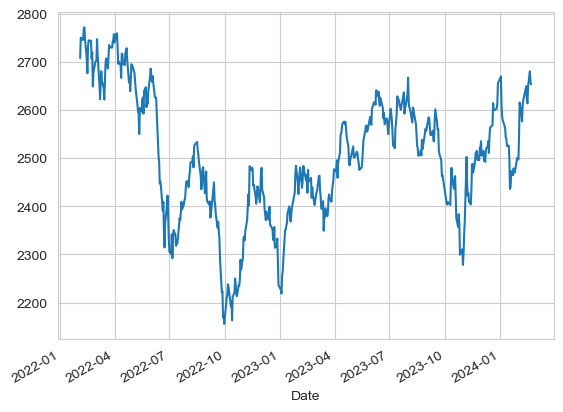

In [47]:
series.plot()

In [48]:
numpy = series.values

In [49]:
numpy[:5]

array([2707.82, 2750.26, 2745.06, 2746.47, 2768.85])

In [50]:
numpy.mean() # mean

2499.7430830039525

In [51]:
numpy.var() # variance

17350.852681799435

In [52]:
numpy.std() # standard deviation

131.72263541927575

In [53]:
series.mean() # series도 문법은 똑같다

2499.7430830039525

In [54]:
series.var()

17385.210805921804

In [55]:
series.std()

131.85298937044166

In [56]:
series.skew() # skewness

-0.1578375012668166

In [57]:
series.kurt() # kurtosis

-0.4200630925824531

In [58]:
series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 506 entries, 2022-02-03 to 2024-02-21
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [59]:
series.describe()

count     506.000000
mean     2499.743083
std       131.852989
min      2155.490000
25%      2409.472500
50%      2495.785000
75%      2601.017500
max      2771.930000
Name: Close, dtype: float64

In [61]:
import numpy as np
np.median(numpy) # median은 함수로 확인 가능하다

2495.785

In [62]:
np.max(numpy) # maximum

2771.93

In [63]:
np.min(numpy) # minimum

2155.49

In [64]:
numpy.max()

2771.93

In [65]:
numpy.min() # method도 가능

2155.49

In [66]:
numpy.sum() # sum

1264870.0

In [67]:
numpy.cumsum() # cumulated sum

array([   2707.82,    5458.08,    8203.14,   10949.61,   13718.46,
         16490.39,   19238.1 ,   21942.58,   24619.12,   27348.8 ,
         30092.89,   32837.41,   35581.21,   38288.  ,   41007.53,
         43656.33,   46333.09,   49032.27,   51735.79,   54482.87,
         57196.3 ,   59847.61,   62470.01,   65150.33,   67811.61,
         70457.26,   73078.79,   75738.02,   78432.53,   81139.55,
         83825.6 ,   86535.6 ,   89270.65,   92000.31,   94730.29,
         97459.85,  100200.92,  102947.66,  105705.31,  108445.16,
        111203.06,  113962.26,  116697.29,  119393.15,  122093.54,
        124786.64,  127453.4 ,  130169.89,  132886.6 ,  135582.66,
        138275.87,  140994.76,  143713.45,  146441.66,  149146.37,
        151803.5 ,  154471.81,  157110.87,  159778.36,  162473.41,
        165160.86,  167841.32,  170518.89,  173163.4 ,  175774.21,
        178370.77,  180963.04,  183513.12,  186117.36,  188713.94,
        191334.38,  193960.36,  196552.7 ,  199191.99,  201839